In [1]:
# Import required libraries
%matplotlib inline
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

In [5]:
# Setting up the routine
kw_list = ["how to breakup"]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

In [6]:
relatedQueriesDict = pytrends.related_queries()
print(relatedQueriesDict)

{'how to breakup': {'top':                                           query  value
0                       how to get over breakup    100
1                     how to get over a breakup     92
2                               how to break up     33
3                             how to do breakup     31
4                      how to deal with breakup     30
5                    how to deal with a breakup     24
6                                how to move on     15
7                   how to breakup with someone     15
8                 how to breakup with boyfriend     12
9                  how long to get over breakup     12
10               how long to get over a breakup     11
11               how to breakup with girlfriend     10
12                               breakup quotes      9
13                      how to overcome breakup      9
14                 how to move on after breakup      9
15                     how to cope with breakup      7
16               how to move on after 

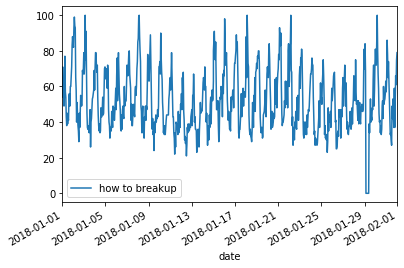

In [7]:
# Interest Over Time
trends = pytrends.interest_over_time()
trendsTime = pytrends.get_historical_interest(
    kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0,
    year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='', gprop='',
    sleep=0
)
trendsTime.plot(y=["how to breakup"])

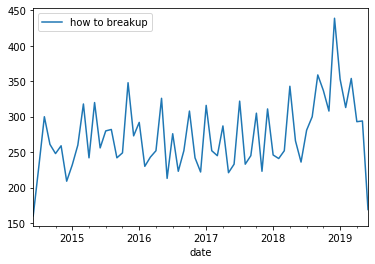

In [8]:
# Interest by Month
resample = trends.resample('M').sum()
resample.plot(y=["how to breakup"])

[]

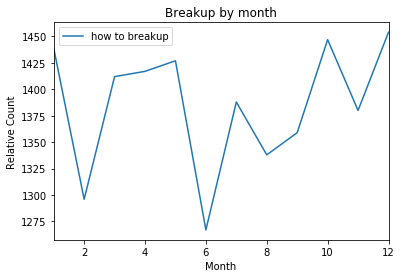

In [9]:
# Interest by Different Timescales
reshapedByMonth = trends.groupby([trends.index.month], as_index=True).sum()
ax = reshapedByMonth.plot(title='Breakup by month')
ax.set_xlabel("Month")
ax.set_ylabel("Relative Count")
plt.plot()

[]

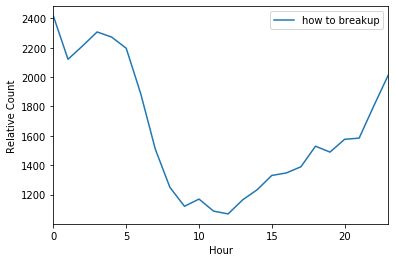

In [10]:
reshapedByArbitrary = trendsTime.groupby([trendsTime.index.hour], as_index=True).sum()
ax = reshapedByArbitrary.plot()
ax.set_xlabel("Hour")
ax.set_ylabel("Relative Count")
plt.plot()
#ax.get_figure().savefig('break.png',dpi=500)

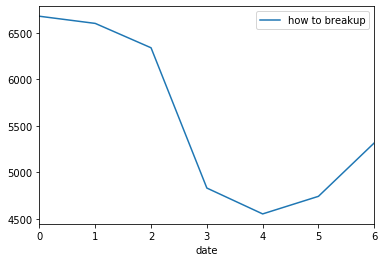

In [11]:
reshapedByArbitrary = trendsTime.groupby([trendsTime.index.dayofweek], as_index=True).sum()
reshapedByArbitrary.plot()

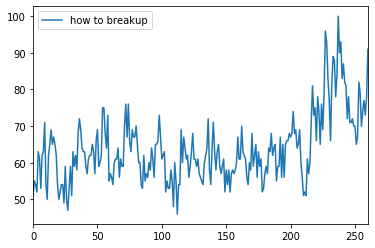

In [12]:
# Adding the index as a column
trends.reset_index(level=0, inplace=True)
trends.head()
trends["date"] = pd.to_datetime(trends["date"])
trends.groupby([trends.date.dt.year, trends.date.dt.month]).agg('count')
trends.plot(y =['how to breakup'])